# Clase 3

Trabajo con pandas, interacción básica con matplotlib e introducción a Bio-python para poder leer secuencias.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # usar el estilo de ggplot2 en gráficas de matplotlib

In [2]:
%matplotlib inline

In [3]:
# Crear un DataFrame con 4 columnas y 1000 número aleatorios en cada una.
df = pd.DataFrame({'col1': randn(1000) + 1, 'col2': randn(1000),
                 'col3': randn(1000) - 1, 'col4' : np.round(randn(1000)+5)})

In [4]:
df.head()  # ver los primeros elementos del DataFrame (default: 5)

,col1,col2,col3,col4
0,-0.283931,1.646111,-1.086946,5
1,2.084967,0.997879,-0.559093,6
2,-0.029291,0.565711,-1.157285,6
3,3.077362,0.996830,-2.222477,6
4,0.465393,1.219375,-0.066795,4


In [5]:
df.describe()  # obtener una descripción general de los datos contenidos en el DataFrame

,col1,col2,col3,col4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.054200,0.027287,-1.051156,5.008000
std,1.013025,1.028815,0.957806,0.992432
min,-2.234740,-3.153513,-4.039579,1.000000
25%,0.362988,-0.652062,-1.686383,4.000000
50%,1.077668,0.042625,-1.039349,5.000000
75%,1.761271,0.729777,-0.443128,6.000000
max,4.039154,3.320696,1.901120,8.000000


In [6]:
df.info()  # obtener información del DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
col1    1000 non-null float64
col2    1000 non-null float64
col3    1000 non-null float64
col4    1000 non-null float64
dtypes: float64(4)
memory usage: 39.1 KB


In [7]:
df["col1"].mean()  # meadia de una columna

1.054200283786709

In [8]:
df["col2"].std()

1.0288150521477393

In [9]:
df["col3"].sum()

-1051.1560763991165

In [10]:
df["col2"].min()

-3.1535125450760164

In [11]:
df["col1"].max()

4.0391536041979368

####El objeto DataFrame de pandas ya tiene funciones específicas para graficar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa581abbe48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa5819665f8>]], dtype=object)

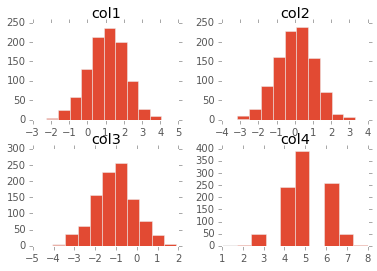

In [12]:
df.hist()  # Graficar un histograma de cada una de las columnas del DataFrame

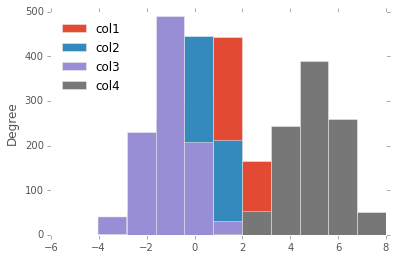

In [13]:
# la función 'plot' puede generar cualquier tipo de gráfica
df.plot(kind="hist")  # genear un histograma con las 4 columnas

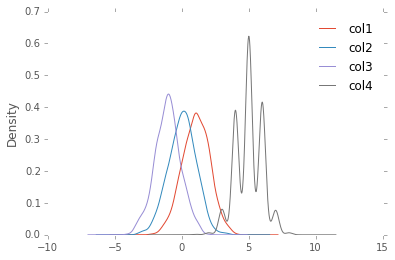

In [14]:
df.plot(kind="density")

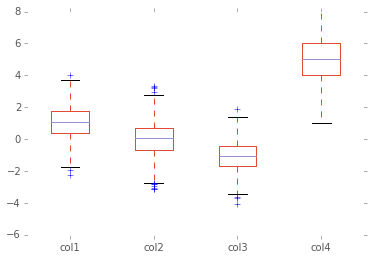

In [15]:
df.plot(kind="box")

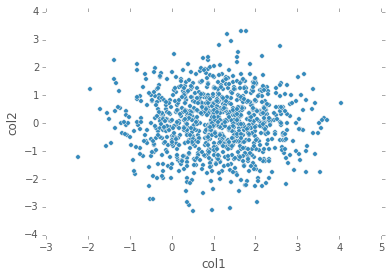

In [16]:
df.plot(x="col1", y="col2", kind="scatter")

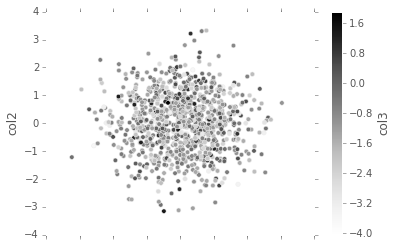

In [17]:
df.plot(x="col1", y="col2", c="col3", kind="scatter")

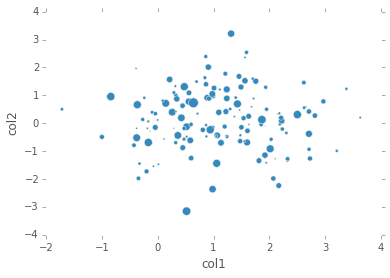

In [18]:
df.plot(x="col1", y="col2", s=df["col3"]*50, kind="scatter")

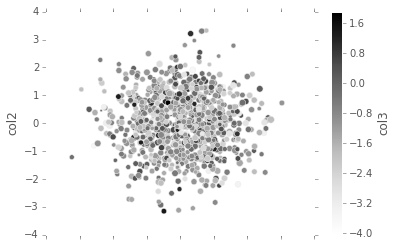

In [19]:
df.plot(x="col1", y="col2", c="col3", s=df["col4"]*6, kind="scatter")

## Biopython

[Bio-python](http://biopython.org) permite representar secuencias biológicas y anotaciones de genomas y es capaz de comunicar con las bases de datos biológicos en línea del NCBI para hacer cálculos. Además, gracias a diversos módulos, puede ser utilizada para trabajar sobre proyectos relativos al alineamiento de secuencias, cálculo de estructuras proteicas, genética de poblaciones, filogenética e inteligencia artificial.

In [20]:
from Bio import SeqIO

Leer secuencias en formato fasta o fastq es muy fácil con SeqIO.

La función para haerlo es SeqIO.parse("ruta/al/archivo", "formato")

In [21]:
sequences = list(SeqIO.parse("consensusVJ.fa", "fasta"))

### Verificar las secuencias leidas

In [22]:
len(sequences)

1234

In [23]:
sequences[0]

SeqRecord(seq=Seq('GCGAGAGTCCGATGGTCCATCGACTGGTACTTCGATCTC', SingleLetterAlphabet()), id='HA7IYCV01_3k.IGHV1-69.IGHJ2.0', name='HA7IYCV01_3k.IGHV1-69.IGHJ2.0', description='HA7IYCV01_3k.IGHV1-69.IGHJ2.0', dbxrefs=[])

In [24]:
print(sequences[0])

ID: HA7IYCV01_3k.IGHV1-69.IGHJ2.0
Name: HA7IYCV01_3k.IGHV1-69.IGHJ2.0
Description: HA7IYCV01_3k.IGHV1-69.IGHJ2.0
Number of features: 0
Seq('GCGAGAGTCCGATGGTCCATCGACTGGTACTTCGATCTC', SingleLetterAlphabet())


In [25]:
sequences[0].id

'HA7IYCV01_3k.IGHV1-69.IGHJ2.0'

In [26]:
sequences[0].seq

Seq('GCGAGAGTCCGATGGTCCATCGACTGGTACTTCGATCTC', SingleLetterAlphabet())

In [27]:
str(sequences[0].seq)

'GCGAGAGTCCGATGGTCCATCGACTGGTACTTCGATCTC'

In [28]:
len(str(sequences[0].seq))

39

## Dandole un poco más de utilidad

Hacer una función para hacer un DataFrame con el contenido siguiente:

* ID de la lectura
* La secuencia
* La longitud de la secuencia

La función debe recibir la lista de las secuencias y retornar un DataFrame con las columnas antes descritas.

Ayuda.

Para crear un DataFrame se puede utilizar cualquiera de las siguientes formas


> df = pd.DataFrame({'col1': list("ABCDE"), 'col2': list("FGHIJ")})

 o

> df = pd.DataFrame()

> df["col1"] = list("ABCDE")

In [29]:
def sequence_list2data_frame(sequences):
    """ Function: sequence_list2data_frame
    
    Params
    ---------
      sequences - List of SeqRecord objects
      
    Return
    ---------
      DataFrame with ID, Sequence, Length columns
    """
    ids  = list()  # IDs list
    seqs = list()  # Sequences list
    lens = list()  # lengths list
    
    for sequence in sequences:
        ids.append(sequence.id)
        seqs.append(str(sequence.seq))
        lens.append( len( str(sequence.seq) ) )
        
    #df = pd.DataFrame({"IDs":ids, "Seq":seqs, "Len": lens})
    df = pd.DataFrame()
    df["IDs"] = ids
    df["Seq"] = seqs
    df["Len"] = lens
    
    return df

df = sequence_list2data_frame(sequences)

In [30]:
df.head()

,IDs,Seq,Len
0,HA7IYCV01_3k.IGHV1-69.IGHJ2.0,GCGAGAGTCCGATGGTCCATCGACTGGTACTTCGATCTC,39
1,HA7IYCV01_3k.IGHV1-69.IGHJ2.1,GCAAAAGAGATCGGCGATGCCTATGACAATGGTGGTTACCACTTCG...,60
2,HA7IYCV01_3k.IGHV1-69.IGHJ1.0,GCGACAACTTACTACGAGAGTAGTCCTTTTCTAGCC,36
3,HA7IYCV01_3k.IGHV6-1.IGHJ4.0,GCAAAAGGGTTATATCAATACTACCTTGACTAC,33
4,HA7IYCV01_3k.IGHV6-1.IGHJ4.1,GCAAGAGAGACGAATGATGATTATCTCTGGGGGAGTTACCGTCACT...,54


In [31]:
df.describe()

,Len
count,1234.000000
mean,45.430308
std,11.157884
min,15.000000
25%,39.000000
50%,45.000000
75%,52.000000
max,84.000000


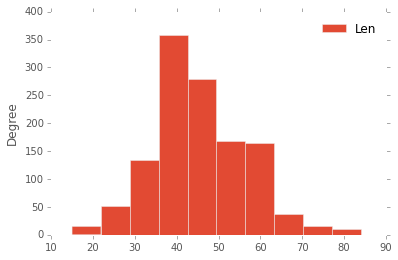

In [32]:
df.plot(kind="hist")

In [33]:
df2 = df.get(df["Len"] >= 40 )  # obtener las secuencias con longitud mayor a 40

In [34]:
df2.head()

,IDs,Seq,Len
1,HA7IYCV01_3k.IGHV1-69.IGHJ2.1,GCAAAAGAGATCGGCGATGCCTATGACAATGGTGGTTACCACTTCG...,60
4,HA7IYCV01_3k.IGHV6-1.IGHJ4.1,GCAAGAGAGACGAATGATGATTATCTCTGGGGGAGTTACCGTCACT...,54
6,HA7IYCV01_3k.IGHV6-1.IGHJ5.0,GCAAGAGAGCCACTTATACTTTCGTTCGGTGAGCCCGACATTTGGT...,54
7,HA7IYCV01_3k.IGHV5-51.IGHJ6.0,GCGAGACACAGAACCCAGGACTTCGGTGACTACGATGTTACCTACG...,57
8,HA7IYCV01_3k.IGHV5-51.IGHJ6.1,GCGAGACATCCTGTCGAGTATAGCAGCATTATTCGGGACTACTACT...,60


In [35]:
df2.describe()

,Len
count,827.000000
mean,51.211608
std,8.409752
min,40.000000
25%,45.000000
50%,48.000000
75%,57.000000
max,84.000000


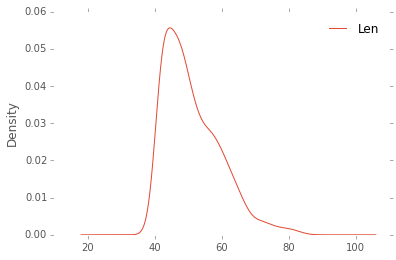

In [36]:
df2.plot(kind="density")